In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pylab
plt.style.use('seaborn')

seed = 46
np.random.seed(seed)

'''for any input number x in [0,1] define the function
y= F(x) = a0 + a1 cos(x) + b1 sin(x) + a2 cos(2x) + b2 sin(2x)'''
'''a and b are numpy arrays of 3 and 2 respectively'''
def F(a,b,x):
    result=a[0]+a[1]*math.cos(x)+b[0]*math.sin(x)+a[2]*math.cos(2*x)+b[1]*math.sin(2*x)
    return(result)

#Creating vectors a and b
a01 = np.array(np.random.uniform(-1, 1, size=(1, 2)))
a2=np.random.uniform(-1/2, 1/2)
b1=np.random.uniform(-1, 1)
b2=np.random.uniform(-1/2, 1/2)

a=np.append(a01, a2).round(2)
b=np.append(b1,b2).round(2)

print('a:\t',a)
print('b:\t',b)

a:	 [ 0.57  0.27 -0.25]
b:	 [ 0.52 -0.19]


In [2]:
#When x=0
F(a,b,0)

0.59

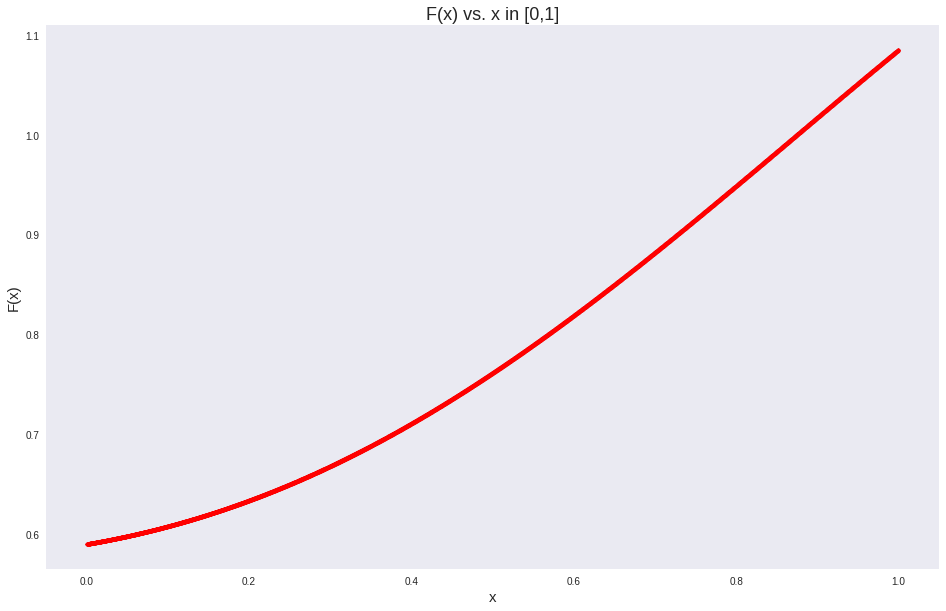

In [3]:
'''plotting function F(x) versus x in [0,1]'''

x_range = np.linspace(0,1,10000) # 10000 linearly spaced numbers for x axis
y = [F(a,b,x) for x in x_range] 

plt.figure(figsize=(16,10))    
plt.grid()
plt.plot(x_range, y, color="red", marker =".")
plt.xlabel("x",size=15)
plt.ylabel("F(x)",size=15)
plt.yticks(rotation=0)
plt.title("F(x) vs. x in [0,1]", size=18)
plt.show()

In [0]:
'''simulate a training set of N =1000 inputs randomly selected in the interval [0,1]
TRAIN.SET = { x1, x2, , xN }
TRAIN.OUTPUTS = {y1, y2, ..., yN} computed by yj= F(xj)'''

train_set= np.array(np.random.uniform(0, 1, size=(1000, 1)))
train_outputs = np.array([F(a,b,x) for x in train_set])

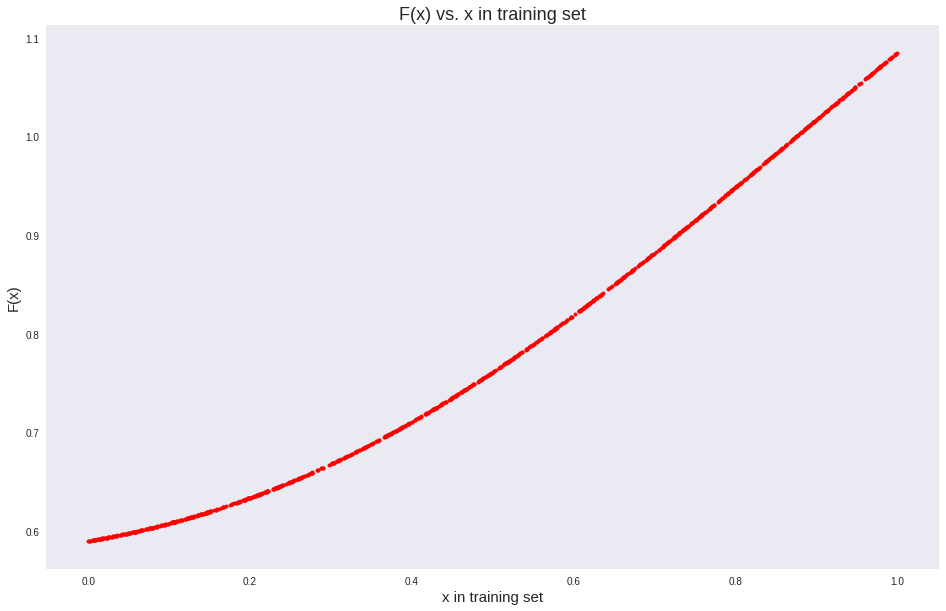

In [5]:
plt.figure(figsize=(16,10))  
plt.grid()
plt.scatter(train_set, train_outputs, marker=".",color="red")
plt.xlabel("x in training set",size=15)
plt.ylabel("F(x)",size=15)
plt.yticks(rotation=0)
plt.title("F(x) vs. x in training set", size=18)
plt.show()

In [0]:
'''simulate a test set of 500 inputs randomly selected in the interval [0,1] TEST.SET = { x_(N+1), , x_(N+500) }
TEST.OUTPUTS = {y_(N+1), ..., y_(N+500} computed by yj= F(xj)'''
test_set= np.array(np.random.uniform(0, 1, size=(500, 1)))
test_outputs = np.array([F(a,b,x) for x in test_set])

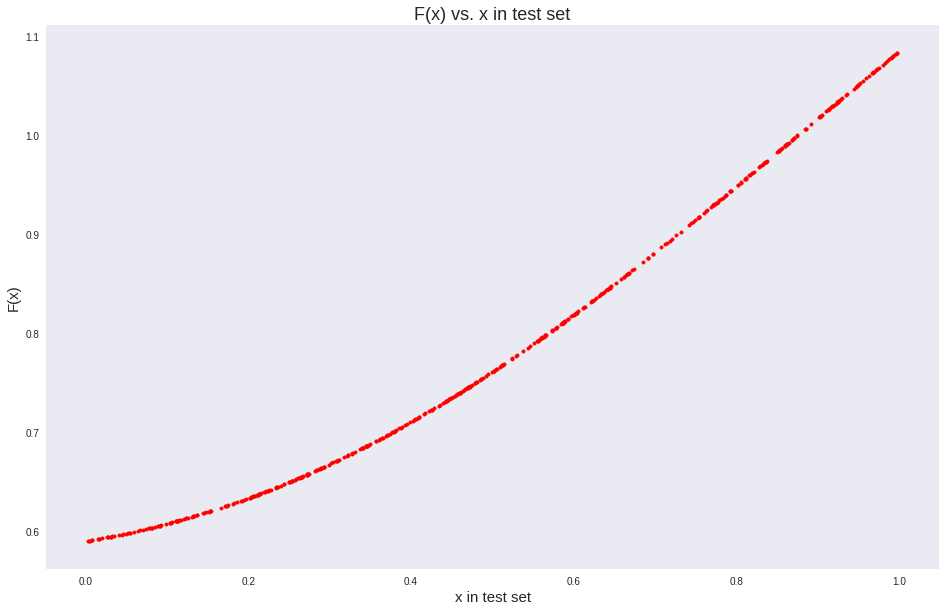

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(16,10))  
plt.grid()
plt.scatter(test_set, test_outputs, color="red", marker=".")
plt.xlabel("x in test set",size=15)
plt.ylabel("F(x)",size=15)
plt.yticks(rotation=0)
plt.title("F(x) vs. x in test set", size=18)
plt.show()

Part 2, step 3:

In [0]:
#pip install --upgrade Tensorflow

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__). #Run with version 2.1

2.1.0


In [10]:
#Verifying size of test and traning sets
shapes = [np.shape(x) for x in [train_set,train_outputs,test_set,test_outputs]]
print(shapes)

[(1000, 1), (1000,), (500, 1), (500,)]


# Creating our model: an MLP with 4 layers:

In [21]:
'''https://www.tensorflow.org/guide/keras/functional'''
from tensorflow.keras import layers

inputs = keras.Input(shape=(1,), name='x')
x = layers.Dense(18, activation='relu')(inputs)
x = layers.Dense(10, activation='relu')(x)
outputs = layers.Dense(1, activation='relu')(x)

model = keras.Model(inputs=inputs  , outputs=outputs, name='my_model')

model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               [(None, 1)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 18)                36        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                190       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Plotting our model as a graph
#keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

#Compiling, training, and evaluating our model

In [38]:

model.compile(loss='mse',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['mse']) 
history = model.fit(train_set, train_outputs,
                    batch_size=64,
                    epochs=100,
                    validation_split=0.2,
                    verbose=0)
scores = model.evaluate(test_set, test_outputs, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



Test loss: 0.00010534420574549586
Test accuracy: 0.0001053442


#Checking accuracy of predictions

MSE:	 0.0005980116209341793


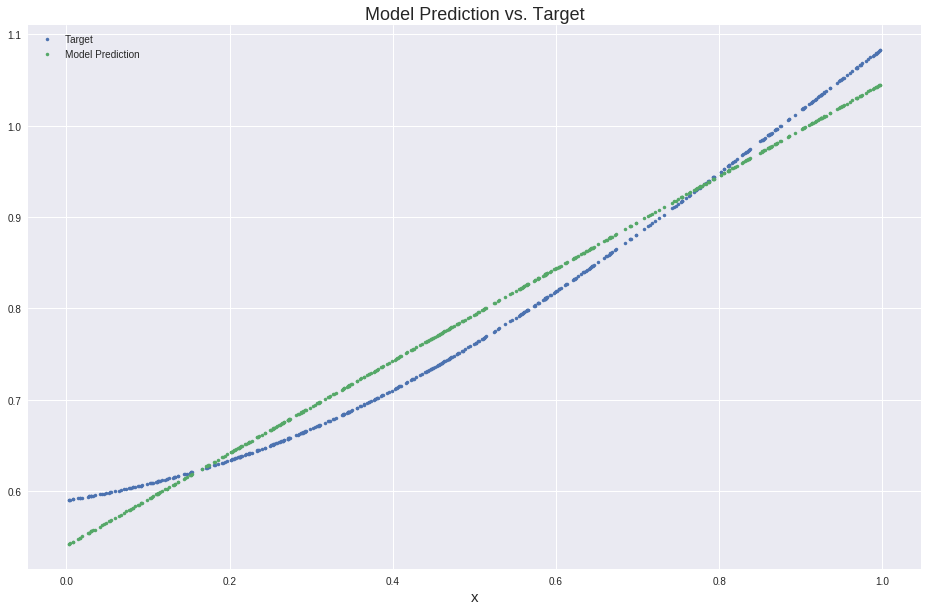

In [34]:
Predictions = model.predict(test_set)
Predictions = Predictions.reshape(500)

print('MSE:\t', np.square(np.subtract(test_outputs,Predictions)).mean()) #  MSE

plt.figure(figsize=(16,10))  
plt.plot(test_set,test_outputs,'.',test_set,Predictions,'.')
plt.legend(('Target','Model Prediction'), fancybox=True)
plt.xlabel("x",size=15)
plt.title("Model Prediction vs. Target", size=18)
plt.show()